In [21]:
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community.kclique import k_clique_communities
import matplotlib.pyplot as plt
from community import community_louvain
import csv
%matplotlib inline
!ls

community-detection.ipynb  Coummity-detection-fifa.ipynb  facebook_combined.txt
communty-detection1.ipynb  CSV				  ternet.csv


In [22]:
edge_data  = []
with open('CSV/2015_FIFA_1M.csv') as datafile:
    data = csv.reader(datafile, delimiter=',')
    header = next(data)
    print("header",header)
    for row in data:
        for i,x in enumerate(row):
            if x!='0' and row[0] != header[i]:
                edge_data.append(row[0]+":"+header[i])

header ['\ufeff""', 'ABDULLAH Prince H.R.H', 'ABEGA Prosper', 'ABO RIDA Hany', 'ACHE Eduardo', 'ACKERMANN Nair', 'ACOSTA Francisco', 'ADAMS Mark', 'ADOUM Djibrine', 'AGHAZADA Sayed', 'AHMAD Ahmad', 'AHMED Essam El-Din', 'AHMED Hosny Abdelrahman', 'AHO Lui', 'AHOUANVOEBLA Sedogbo', 'AKHTER Mahfuza', 'AL BUSAIDI Khalid Hamed Hamood', 'AL DELAWAR Abdulrahman', 'AL HARBI Ahmed Eid', 'AL KHALIFA Shk. Ali Bin Khalifa', 'AL KHALIFA Shk. Salman Bin Ebrahim', 'AL KHELAIFI Nasser', 'AL MAADHEED Mohammed Ghanim Al Ali', 'AL MEDLEJ Hafez', 'AL NOWAISER Mohammed', 'AL RAJOUB Jibril', 'AL SABAH Sheikh Ahmad Al Fahad', 'AL SABAH Shk. Talal Fahad', 'AL SERKAL Yousuf', 'AL SHAIBANI Hamid', 'AL THAWADI Hassan', 'ALAJA Pertti', 'ALARCON Carlos', 'ALBERTINI Demetrio', 'ALEI Chabur Goc', 'ALLARD Vanessa', 'ALTASHANI Anwar', 'ALVARADO Ariel', 'AMGALANBAATAR Ganbaatar', 'ANDREASEN Christian', 'ARAB Abdiqani Said', 'ARANETA Mariano', 'ARCOPINTO Ferdinando', 'ARIIOTIMA Henri', 'ARVELADZE Revaz', 'ASFA Seyed Ha

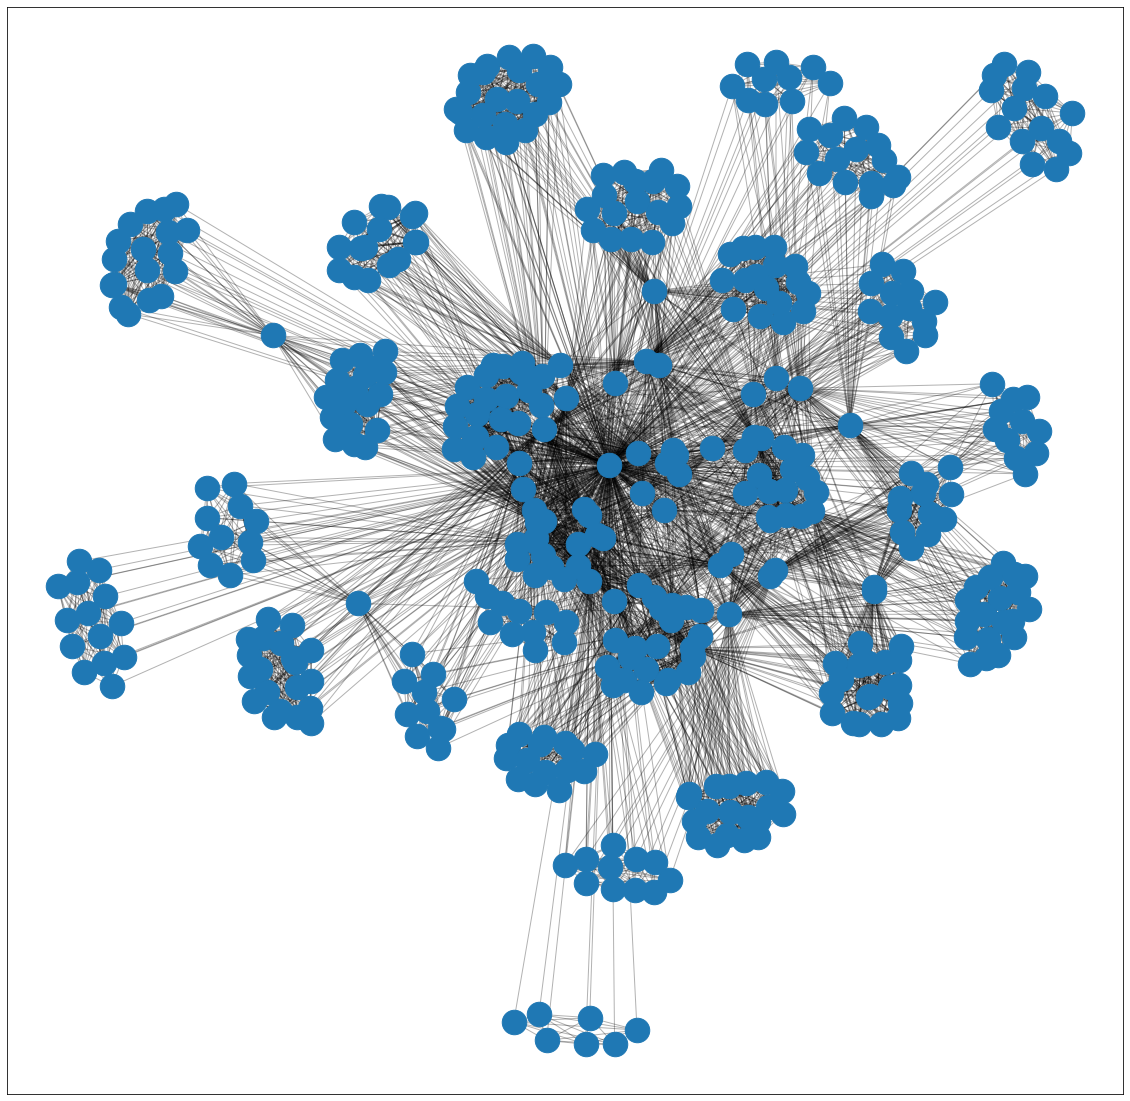

In [23]:
G = nx.parse_edgelist(edge_data, nodetype = str, delimiter=":")
pos = nx.spring_layout(G)
plt.figure(figsize=(20, 20))  # image is 8 x 8 inches
nx.draw_networkx_nodes(G, pos, node_size=600, cmap=plt.cm.RdYlBu)
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.show(G)

In [24]:
print(len(G.nodes))
print(len(G.edges))

451
5472


# K_clique

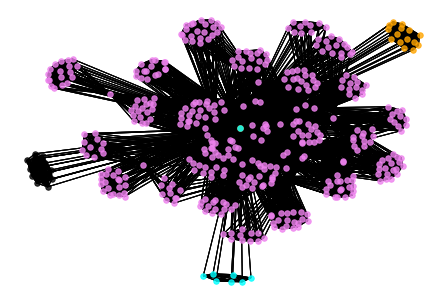

In [25]:
communities = list(k_clique_communities(G, 3))
colors = ["violet", "black", "orange", "cyan", "blue", "green", "yellow", "indigo", "pink", "red"]
for i in range(len(communities)):
    graph = communities[i]
    node_list = [node for node in graph]
    nx.draw(G, pos, nodelist=node_list, node_color=colors[i%10], node_size=30, alpha=0.8)

# Girwan Newman

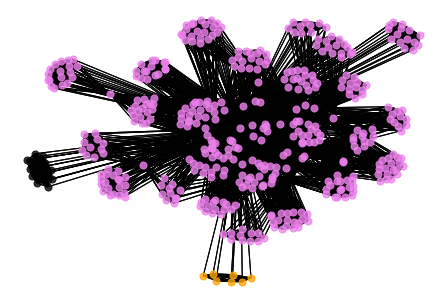

In [26]:
communities_generator = girvan_newman(G)
colors = ["violet", "black", "orange", "cyan", "blue", "green", "yellow", "indigo", "pink", "red"]
next(communities_generator)
communit = next(communities_generator)
for i in range(len(communit)):
    graph = communit[i]
    node_list = [node for node in graph]
    nx.draw(G, pos, nodelist=node_list, node_color=colors[i%10], node_size=50, alpha=0.8)

# Louvain

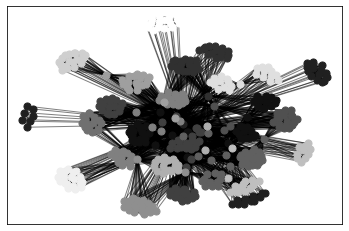

In [27]:
partition = community_louvain.best_partition(G)
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()):
    count += 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 50,node_color = str(count / size)) 
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()